In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn

from IPython import display

In [2]:
import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

## 1. Create data

In [3]:
N = 30
x = torch.randn(N,1)

y = x + torch.randn(N,1)/2

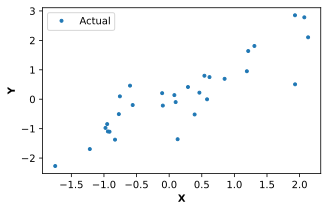

In [4]:
# Plotting

plt.figure(figsize = (5,3) ,dpi = 130)

plt.plot(x ,y ,'.' , label = "Actual")
plt.xlabel("X" , fontweight = "bold")
plt.ylabel("Y", fontweight = "bold")
plt.legend()

plt.show()

## 2. Build Artificial Neural Network(ANN)

In [35]:
ANNreg = nn.Sequential(
                       # Neuron -1
                       nn.Linear(in_features= 1,out_features = 1), # Input Layer
                       nn.ReLU(),                                  # Activation Function
                       
                       # Neuron -2
                       nn.Linear(in_features= 1,out_features = 1)  # Output Layer
                
                      )

In [36]:
ANNreg

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
)

In [37]:
# Learning rate
learningrate = .05

# Loss Function - mean squared loss
lossfunc = nn.MSELoss()

# Optimizer : SGD -stochastic gradient descent
optimizer = torch.optim.SGD(params =ANNreg.parameters() , lr = learningrate)

#### Before Training

In [38]:
for layer in ANNreg.children():
    if isinstance(layer, nn.Linear):
        print("weight :",layer.state_dict()['weight'])
        print("Bias :",layer.state_dict()['bias'])

weight : tensor([[-0.7852]])
Bias : tensor([-0.7299])
weight : tensor([[-0.5503]])
Bias : tensor([-0.4430])


## 3. Model Training

In [39]:
epochs = 500
losses = torch.zeros(epochs)

for epoc in range(epochs):
        
    # Forward Propagation
    y_hat = ANNreg(x)
    
    # Compute Losses
    loss = lossfunc(y_hat , y)
    losses[epoc] = loss
    
    # Backpropagation
    optimizer.zero_grad()  # reinitialize
    loss.backward()
    optimizer.step()

#### After Training

In [40]:
for layer in ANNreg.children():
    if isinstance(layer, nn.Linear):
        print("weight :",layer.state_dict()['weight'])
        print("Bias :",layer.state_dict()['bias'])

weight : tensor([[-0.7269]])
Bias : tensor([1.4828])
weight : tensor([[-1.3627]])
Bias : tensor([1.9636])


In [41]:
for layer in ANNreg.children():
    if isinstance(layer, nn.Linear):
        print("weight :",layer.state_dict())
        print("Bias :",layer.state_dict())

weight : OrderedDict([('weight', tensor([[-0.7269]])), ('bias', tensor([1.4828]))])
Bias : OrderedDict([('weight', tensor([[-0.7269]])), ('bias', tensor([1.4828]))])
weight : OrderedDict([('weight', tensor([[-1.3627]])), ('bias', tensor([1.9636]))])
Bias : OrderedDict([('weight', tensor([[-1.3627]])), ('bias', tensor([1.9636]))])


In [42]:
# Final Pass
predictions = ANNreg(x)

# Final loss(MSE)
# Returns single value
testloss = (predictions-y).pow(2).mean() 

#### Plotting loss versus Iteration 

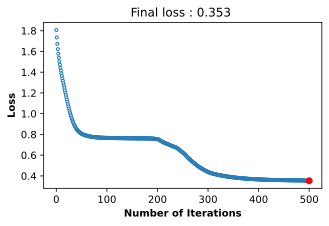

In [47]:
plt.figure(figsize = (5,3) , dpi = 130)

plt.plot(losses.detach(),'.',markerfacecolor = "w" , linewidth= 0.1)
plt.plot(epochs , testloss.detach() , "ro")

plt.xlabel("Number of Iterations" , fontweight = "bold")
plt.ylabel("Loss"  , fontweight = "bold")

plt.title(f"Final loss : {np.round(testloss.item(),3)} ")
plt.show()

#### Plotting the actual and predicted y values 

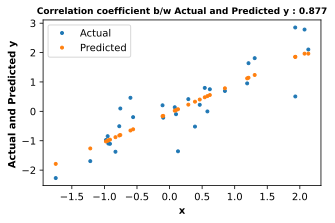

In [46]:
corr_coef = np.round(np.corrcoef(predictions.detach().flatten() , y.flatten())[0,1],3)

plt.figure(figsize = (5,3) , dpi = 130)

plt.plot(x,y,'.' , label = "Actual")
plt.plot(x,predictions.detach(),'.' , label = "Predicted")

plt.xlabel("x" , fontweight = "bold")
plt.ylabel("Actual and Predicted y " , fontweight = "bold")
plt.title(f"Correlation coefficient b/w Actual and Predicted y : {corr_coef}" , 
          fontsize = 9 , 
          fontweight = "bold")

plt.legend()

plt.show()